In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D://down2//cars.csv')

In [3]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18.0,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21.0,29.0,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20.0,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21.0,30.0,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16.0,26.0,p,compact


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           229 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             230 non-null float64
hwy             228 non-null float64
fl              234 non-null object
class           234 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 20.2+ KB


In [5]:
df.isnull().sum()

manufacturer    0
model           0
displ           5
year            0
cyl             0
trans           0
drv             0
cty             4
hwy             6
fl              0
class           0
dtype: int64

In [6]:
# 1
from sklearn.impute import SimpleImputer as SI
imp = SI()
imp=imp.fit(df[['hwy']])
df['hwy'] = imp.transform(df[['hwy']]).ravel()

In [7]:
# 2
df['cty']=df['cty'].fillna(method='backfill')
df['displ']=df['displ'].fillna(method='backfill')

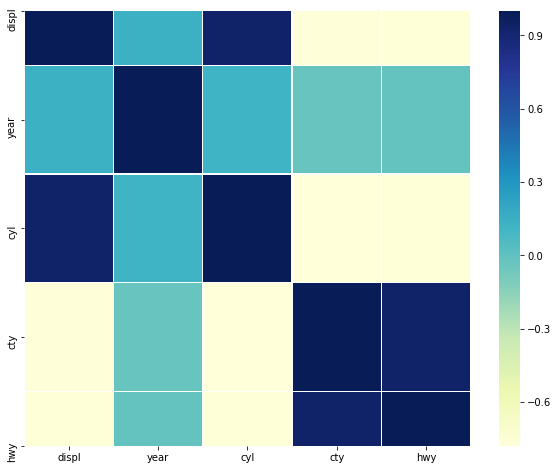

In [43]:
# 3
f,ax = plt.subplots(figsize =(10,8)) 
corr = df.corr()
sns.heatmap(corr, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [9]:
# higher correlations: - displ~cyl,cty,hwy ;   cyl~cty, hwy ; 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null float64
hwy             234 non-null float64
fl              234 non-null object
class           234 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 20.2+ KB


Text(0, 0.5, 'city miles per gallon')

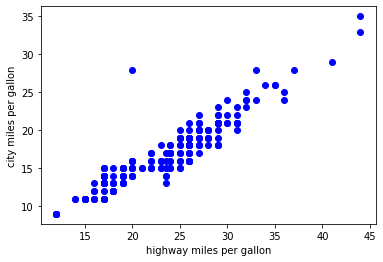

In [10]:
# 4
plt.scatter(df['hwy'], df['cty'],color = 'b', marker = 'o')
plt.xlabel('highway miles per gallon')
plt.ylabel('city miles per gallon')
# These two varibales correlated linearly

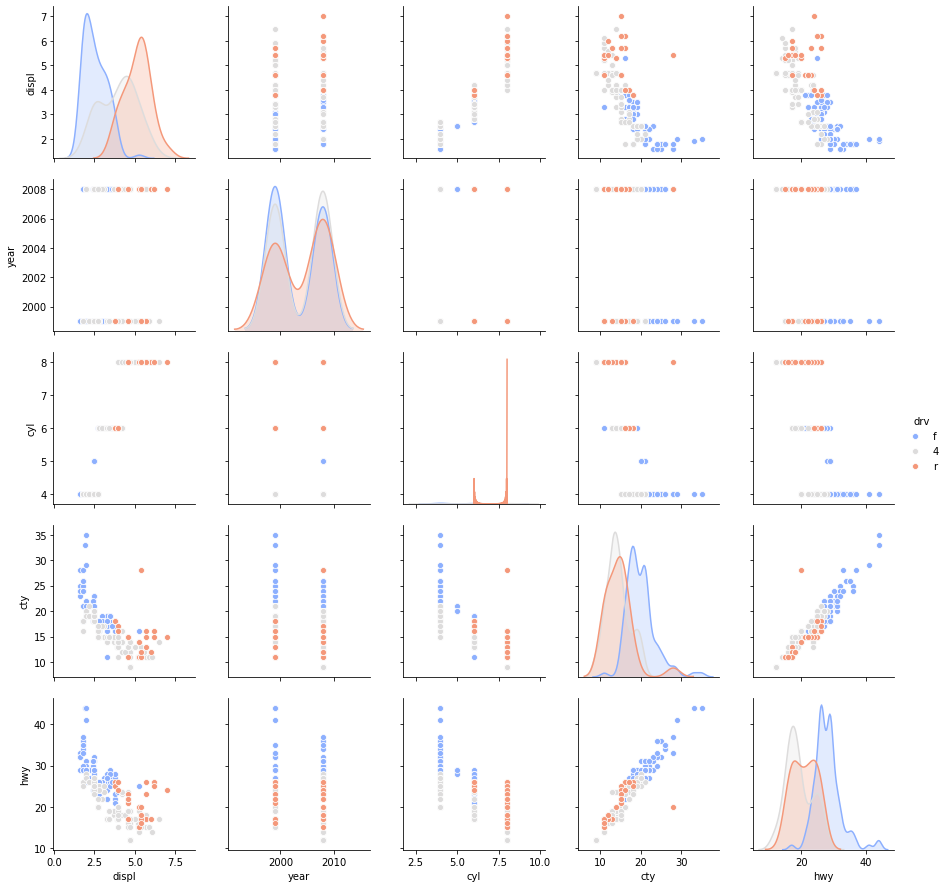

In [11]:
# 5
sns.pairplot(df,hue='drv',palette='coolwarm')

[Text(0, 0, 'a4'),
 Text(0, 0, 'a4 quattro'),
 Text(0, 0, 'a6 quattro'),
 Text(0, 0, 'c1500 suburban 2wd'),
 Text(0, 0, 'corvette'),
 Text(0, 0, 'k1500 tahoe 4wd'),
 Text(0, 0, 'malibu'),
 Text(0, 0, 'caravan 2wd'),
 Text(0, 0, 'dakota pickup 4wd'),
 Text(0, 0, 'durango 4wd'),
 Text(0, 0, 'ram 1500 pickup 4wd'),
 Text(0, 0, 'expedition 2wd'),
 Text(0, 0, 'explorer 4wd'),
 Text(0, 0, 'f150 pickup 4wd'),
 Text(0, 0, 'mustang'),
 Text(0, 0, 'civic'),
 Text(0, 0, 'sonata'),
 Text(0, 0, 'tiburon'),
 Text(0, 0, 'grand cherokee 4wd'),
 Text(0, 0, 'range rover'),
 Text(0, 0, 'navigator 2wd'),
 Text(0, 0, 'mountaineer 4wd'),
 Text(0, 0, 'altima'),
 Text(0, 0, 'maxima'),
 Text(0, 0, 'pathfinder 4wd'),
 Text(0, 0, 'grand prix'),
 Text(0, 0, 'forester awd'),
 Text(0, 0, 'impreza awd'),
 Text(0, 0, '4runner 4wd'),
 Text(0, 0, 'camry'),
 Text(0, 0, 'camry solara'),
 Text(0, 0, 'corolla'),
 Text(0, 0, 'land cruiser wagon 4wd'),
 Text(0, 0, 'toyota tacoma 4wd'),
 Text(0, 0, 'gti'),
 Text(0, 0, 'jetta'

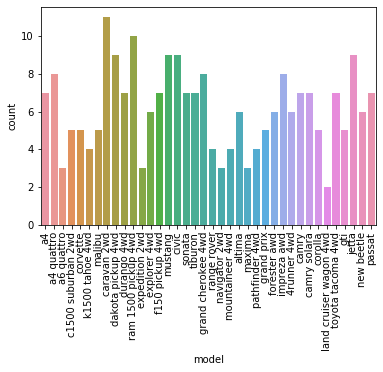

In [12]:
# 6
chart = sns.countplot(x='model',data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

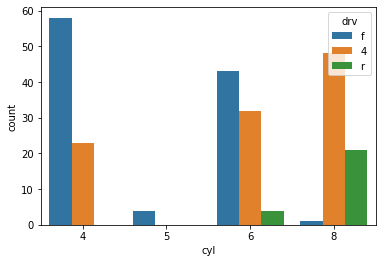

In [13]:
# 7
sns.countplot(x='cyl',data=df, hue='drv')
# a) most frequent drive train is 'f'

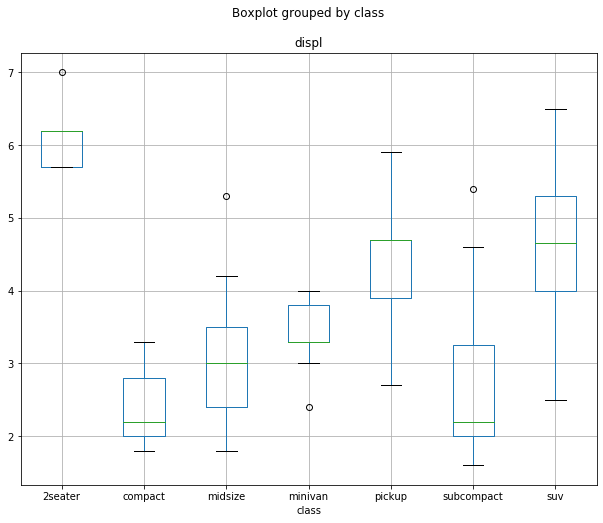

In [44]:
#8
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['displ'], by='class', ax=ax, grid=True)
# ax.violinplot()

In [98]:
df['displ'].unique()

array([1.8, 2. , 2.8, 3.1, 4.2, 5.3, 5.7, 6. , 6.2, 7. , 6.5, 2.4, 3.5,
       3.6, 3. , 3.3, 3.8, 4. , 3.7, 3.9, 4.7, 5.2, 5.9, 4.6, 5.4, 5. ,
       1.6, 2.7, 6.1, 4.4, 2.5, 5.6, 2.2, 3.4, 1.9])

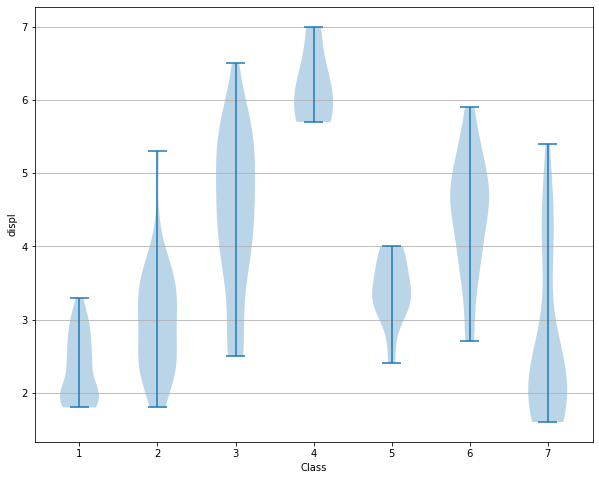

In [93]:
# 9
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
ax.violinplot(dataset=[df[df['class']=='compact']['displ'].values,
                       df[df['class']=='midsize']['displ'].values,
                       df[df['class']=='suv']['displ'].values,
                       df[df['class']=='2seater']['displ'].values,
                       df[df['class']=='minivan']['displ'].values,
                       df[df['class']=='pickup']['displ'].values,
                       df[df['class']=='subcompact']['displ'].values
                      ])
ax.yaxis.grid(True)
ax.set_xlabel('Class')
ax.set_ylabel('displ')
plt.show()

In [ ]:
# 10
